In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewsundberg/college-basketball-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/liufamily/.cache/kagglehub/datasets/andrewsundberg/college-basketball-dataset/versions/7


In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import os


In [39]:
data=pd.read_csv('cbb.csv')
data

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


In [40]:
value_mapping = {
    np.nan: 0,
    "R68": 1,
    "R64": 2,
    "R32": 3,
    "S16": 4,
    "E8": 5,
    "F4": 6,
    "2ND": 7,
    "Champions": 8
}
data_cleaned = data.copy()
data_cleaned2 = data_cleaned.drop(['TEAM', 'G', 'W', 'CONF', 'YEAR'], axis=1)
data_cleaned['POSTSEASON'] = data_cleaned["POSTSEASON"].replace(value_mapping)
data_cleaned2['POSTSEASON'] = data_cleaned2["POSTSEASON"].replace(value_mapping)

data_cleaned = pd.get_dummies(data_cleaned, columns=['CONF'])
data_cleaned = pd.get_dummies(data_cleaned, columns=['YEAR'])
data_cleaned = data_cleaned.drop(['TEAM', 'G', 'W'], axis=1)
data_cleaned = data_cleaned.astype(float)
data_cleaned2 = data_cleaned2.astype(float)
data_cleaned2.fillna(0.0, inplace=True)
data_cleaned

/var/folders/q0/hn6y49dn3qlbbv0j58dc42tm0000gn/T/ipykernel_49694/3056234001.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['POSTSEASON'] = data_cleaned["POSTSEASON"].replace(value_mapping)
/var/folders/q0/hn6y49dn3qlbbv0j58dc42tm0000gn/T/ipykernel_49694/3056234001.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned2['POSTSEASON'] = data_cleaned2["POSTSEASON"].replace(value_mapping)


,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,...,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,YEAR_2021,YEAR_2022,YEAR_2023
0,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,29.8,30.9,34.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3519,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,25.3,20.2,26.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3520,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,28.9,29.1,35.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3521,112.4,97.0,0.8453,50.3,47.3,17.3,19.3,35.8,29.3,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
data_cleaned_no_seed = data_cleaned.drop('SEED', axis=1)

In [42]:
X_data_array = data_cleaned2.drop(["POSTSEASON", 'SEED', 'WAB'], axis=1).to_numpy()

In [43]:
y_labels_array = data_cleaned['POSTSEASON'].to_numpy()
y_labels_array.astype(int)

array([7, 7, 7, ..., 0, 0, 0])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_data_array, y_labels_array, test_size=0.2)


In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [47]:
y_train_binary = (y_train != 0).astype(int)

# Train-test split
X_train_step1, X_test_step1, y_train_step1, y_test_step1 = train_test_split(X_train, y_train_binary, test_size=0.2)

# Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_step1, y_train_step1)

# Evaluate
y_pred_step1 = log_reg.predict(X_test_step1)
print(classification_report(y_test_step1, y_pred_step1))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       450
           1       0.60      0.88      0.71       114

    accuracy                           0.86       564
   macro avg       0.78      0.86      0.81       564
weighted avg       0.89      0.86      0.87       564



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
X_train_step1.shape

(2254, 16)

In [49]:
def anomaly_detection(x_input, model):
    return model.predict([x_input])

In [50]:
X_train_step2 = X_train[y_train != 0]
y_train_step2 = y_train[y_train != 0]

In [51]:
y_train_one_hot = tf.one_hot(y_train_step2 - 1, depth=8)  # Classes 1-8 become indices 0-7
y_test_one_hot = tf.one_hot(y_test[y_test != 0] - 1, depth=8)

# Define the neural network
input_dim = 16  # Number of features in your input data
nn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),  # Input layer with 16 features
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')  # 8 output classes (1-8)
])

# Compile the nn_model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the nn_model
nn_model.fit(X_train_step2, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the nn_model
nn_model.evaluate(X_test[y_test != 0], y_test_one_hot)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2097 - loss: 9.6852 - val_accuracy: 0.4643 - val_loss: 3.3863
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4280 - loss: 2.8744 - val_accuracy: 0.3571 - val_loss: 1.8447
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4558 - loss: 1.8612 - val_accuracy: 0.5179 - val_loss: 1.5341
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4848 - loss: 1.7218 - val_accuracy: 0.4643 - val_loss: 1.4748
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4659 - loss: 1.6347 - val_accuracy: 0.5536 - val_loss: 1.4358
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4555 - loss: 1.4937 - val_accuracy: 0.5446 - val_loss: 1.4306
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4899 - loss: 1.4756 - val_accuracy: 0.5625 - val_loss: 1.4584
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3808 - loss: 1.6195 - val_accuracy: 0.5625 - val_loss

[1.6503852605819702, 0.3629032373428345]

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Filter non-class 0 data
X_train_step2 = X_train[y_train != 0]
y_train_step2 = y_train[y_train != 0]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(X_train_step2, y_train_step2)

# Evaluate
y_pred_rf = rf.predict(X_test[y_test != 0])
print("Random Forest Accuracy:", accuracy_score(y_test[y_test != 0], y_pred_rf))

Random Forest Accuracy: 0.47580645161290325


In [53]:
from sklearn.svm import SVC

# Train SVM (with probability estimates enabled)
svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm.fit(X_train_step2, y_train_step2)

# Evaluate
y_pred_svm = svm.predict(X_test[y_test != 0])
print("SVM Accuracy:", accuracy_score(y_test[y_test != 0], y_pred_svm))

SVM Accuracy: 0.24193548387096775


In [66]:
def hierarchical_classifier(x_input, anomaly_model, multiclass_models, model):
    is_anomalous = anomaly_detection(x_input, anomaly_model)
    if is_anomalous == 0:
        return 0  # Class 0
    nn_pred = multiclass_models['nn'].predict([x_input]).argmax()
    svm_pred = multiclass_models['svm'].predict([x_input]).argmax()
    rf_pred = multiclass_models['rf'].predict([x_input]).argmax()
    return multiclass_models[model].predict([x_input]).argmax()

In [67]:
multiclass_models = {
    'rf': rf,  # Random Forest
    'svm': svm,  # Support Vector Machine
    'nn': nn_model,   # Neural Network
}


In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Step 1: Anomaly Detection
def anomaly_detection(x_input, log_reg):
    """Predict if input belongs to class 0 or classes 1-8 using the logistic regression model."""
    return log_reg.predict([x_input])[0]  # 0: normal (class 0), 1: anomaly (classes 1-8)

# Step 2: Multiclass Classification
def multiclass_classification(x_input, multiclass_models, model):
    """Classify input among classes 1-8 using a chosen model."""
    if model == 'nn': 
        x_input = np.expand_dims(x_input, axis=0) 
        y_pred_probs = multiclass_models['nn'].predict(x_input)
        return y_pred_probs.argmax() 
    else:  # Random Forest or SVM
        return multiclass_models[model].predict([x_input])[0]

# Hierarchical Classifier
def hierarchical_classifier(x_input, log_reg, multiclass_models, model):
    """Hierarchical classifier combining step 1 and step 2."""
    is_anomalous = anomaly_detection(x_input, log_reg)
    if is_anomalous == 0:
        return 0  # Class 0
    return multiclass_classification(x_input, multiclass_models, model)

# Evaluate Step 1: Anomaly Detection
def evaluate_step1(log_reg, X_test, y_test):
    """Evaluate anomaly detection model."""
    y_test_step1 = (y_test != 0).astype(int)  # Binary labels: 0 (normal) or 1 (anomaly)
    y_pred_step1 = log_reg.predict(X_test)
    print("Step 1: Anomaly Detection Metrics")
    print(classification_report(y_test_step1, y_pred_step1))
    return y_pred_step1

# Evaluate Step 2: Multiclass Classification
def evaluate_step2(multiclass_models, X_test, y_test, model):
    """Evaluate multiclass classification model."""
    X_test_step2 = X_test[y_test != 0]  # Only anomalies
    y_test_step2 = y_test[y_test != 0]  # True labels for anomalies
    if model == 'nn':  # For Neural Network
        # Ensure input is 2D
        if X_test_step2.ndim == 1:
            X_test_step2 = np.expand_dims(X_test_step2, axis=0)  # Shape: (1, n_features)
        y_pred_probs = multiclass_models['nn'].predict(X_test_step2)
        y_pred_step2 = y_pred_probs.argmax(axis=1)  # Get class labels from probabilities
    else:  # For Random Forest or SVM
        y_pred_step2 = multiclass_models[model].predict(X_test_step2)
    print("Step 2: Multiclass Classification Metrics")
    print(classification_report(y_test_step2, y_pred_step2))
    return y_pred_step2

# Evaluate Full Pipeline
def evaluate_pipeline(X_test, y_test, log_reg, multiclass_models, model):
    """Evaluate the full hierarchical classifier pipeline."""
    y_pred = []
    for x_input in X_test:
        y_pred.append(hierarchical_classifier(x_input, log_reg, multiclass_models, model))
    
    print("Full Pipeline Metrics")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Example Usage
# Assumptions:
# - `log_reg`: Trained logistic regression model for step 1
# - `multiclass_models`: Dictionary containing trained models for step 2
#   E.g., {'rf': RandomForestClassifier, 'svm': SVM, 'nn': NeuralNetwork}
# - `X_test`, `y_test`: Full test dataset and labels

# Evaluate Step 1



### Evaluating Step 1 (Anomaly Detection) ###
Step 1: Anomaly Detection Metrics
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       581
           1       0.50      0.85      0.63       124

    accuracy                           0.82       705
   macro avg       0.73      0.84      0.76       705
weighted avg       0.88      0.82      0.84       705


### Evaluating Step 2 (Multiclass Classification) SVM ###
Step 2: Multiclass Classification Metrics
              precision    recall  f1-score   support

         1.0       0.14      0.43      0.21         7
         2.0       0.65      0.22      0.33        50
         3.0       0.44      0.22      0.30        36
         4.0       0.00      0.00      0.00        12
         5.0       0.12      0.60      0.21        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.12      0.67      0.21         3

    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Step 2: Multiclass Classification Metrics
              precision    recall  f1-score   support

         1.0       0.11      0.71      0.19         7
         2.0       0.40      0.12      0.18        50
         3.0       0.34      0.58      0.43        36
         4.0       0.00      0.00      0.00        12
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         3

    accuracy                           0.26       124
   macro avg       0.11      0.18      0.10       124
weighted avg       0.27      0.26      0.21       124


### Evaluating Full Hierarchical Classifier SVM ###
Full Pipeline Metrics
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       581
         1.0       0.00      0.00      0.00         7
         2.0       0.11      0.18      0.14        50
         3.0   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Full Pipeline Metrics
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       581
         1.0       0.00      0.00      0.00         7
         2.0       0.17      0.56      0.27        50
         3.0       0.48      0.36      0.41        36
         4.0       0.26      0.42      0.32        12
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.50      0.33      0.40         3

    accuracy                           0.74       705
   macro avg       0.26      0.28      0.25       705
weighted avg       0.84      0.74      0.78       705

Confusion Matrix:
[[475   0 103   3   0   0   0   0   0]
 [  3   0   3   1   0   0   0   0   0]
 [ 12   0  28   7   3   0   0   0   0]
 [  2   0  16  13   3   2   0   0   0]
 [  0   0   6   1   5   0   0   0   0]
 [  1   0   3   2   4   0   0   0   0]
 [  0   0   1   0   3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [77]:
print("### Evaluating Step 1 (Anomaly Detection) ###")
evaluate_step1(log_reg, X_test, y_test)

### Evaluating Step 1 (Anomaly Detection) ###
Step 1: Anomaly Detection Metrics
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       581
           1       0.50      0.85      0.63       124

    accuracy                           0.82       705
   macro avg       0.73      0.84      0.76       705
weighted avg       0.88      0.82      0.84       705



array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
print("\n### Evaluating Step 2 (Multiclass Classification) SVM ###")
evaluate_step2(multiclass_models, X_test, y_test, 'svm')
print("\n### Evaluating Step 2 (Multiclass Classification) RF ###")
evaluate_step2(multiclass_models, X_test, y_test, 'rf')
print("\n### Evaluating Step 2 (Multiclass Classification) NN ###")
evaluate_step2(multiclass_models, X_test, y_test, 'nn')


### Evaluating Step 2 (Multiclass Classification) SVM ###
Step 2: Multiclass Classification Metrics
              precision    recall  f1-score   support

         1.0       0.14      0.43      0.21         7
         2.0       0.65      0.22      0.33        50
         3.0       0.44      0.22      0.30        36
         4.0       0.00      0.00      0.00        12
         5.0       0.12      0.60      0.21        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.12      0.67      0.21         3

    accuracy                           0.24       124
   macro avg       0.19      0.27      0.16       124
weighted avg       0.41      0.24      0.25       124


### Evaluating Step 2 (Multiclass Classification) RF ###
Step 2: Multiclass Classification Metrics
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.53      0.80      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Step 2: Multiclass Classification Metrics
              precision    recall  f1-score   support

         1.0       0.11      0.71      0.19         7
         2.0       0.40      0.12      0.18        50
         3.0       0.34      0.58      0.43        36
         4.0       0.00      0.00      0.00        12
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         3

    accuracy                           0.26       124
   macro avg       0.11      0.18      0.10       124
weighted avg       0.27      0.26      0.21       124



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([1, 2, 3, 2, 3, 1, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 3, 1, 3, 1, 3,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2,
       2, 2, 1, 1, 1, 3, 3, 4, 2, 1, 3, 3, 1, 3])

In [79]:
# Evaluate Full Pipeline
print("\n### Evaluating Full Hierarchical Classifier SVM ###")
evaluate_pipeline(X_test, y_test, log_reg, multiclass_models, 'svm')
print("\n### Evaluating Full Hierarchical Classifier RF ###")
evaluate_pipeline(X_test, y_test, log_reg, multiclass_models, 'rf')
print("\n### Evaluating Full Hierarchical Classifier NN ###")
evaluate_pipeline(X_test, y_test, log_reg, multiclass_models, 'nn')


### Evaluating Full Hierarchical Classifier SVM ###
Full Pipeline Metrics
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       581
         1.0       0.00      0.00      0.00         7
         2.0       0.11      0.18      0.14        50
         3.0       0.21      0.22      0.22        36
         4.0       0.00      0.00      0.00        12
         5.0       0.12      0.60      0.20        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.12      0.67      0.21         3

    accuracy                           0.71       705
   macro avg       0.17      0.28      0.18       705
weighted avg       0.81      0.71      0.75       705

Confusion Matrix:
[[475  15  68  20   0   2   0   1   0]
 [  3   0   2   0   0   2   0   0   0]
 [ 12   6   9   9   0  12   0   1   1]
 [  2   0   4   8   0  17   0   0   5]
 [  0   0   0   1   0   8   0   2   1]
 [  1  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Full Pipeline Metrics
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       581
         1.0       0.00      0.00      0.00         7
         2.0       0.17      0.56      0.27        50
         3.0       0.48      0.36      0.41        36
         4.0       0.26      0.42      0.32        12
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.50      0.33      0.40         3

    accuracy                           0.74       705
   macro avg       0.26      0.28      0.25       705
weighted avg       0.84      0.74      0.78       705

Confusion Matrix:
[[475   0 103   3   0   0   0   0   0]
 [  3   0   3   1   0   0   0   0   0]
 [ 12   0  28   7   3   0   0   0   0]
 [  2   0  16  13   3   2   0   0   0]
 [  0   0   6   1   5   0   0   0   0]
 [  1   0   3   2   4   0   0   0   0]
 [  0   0   1   0   3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

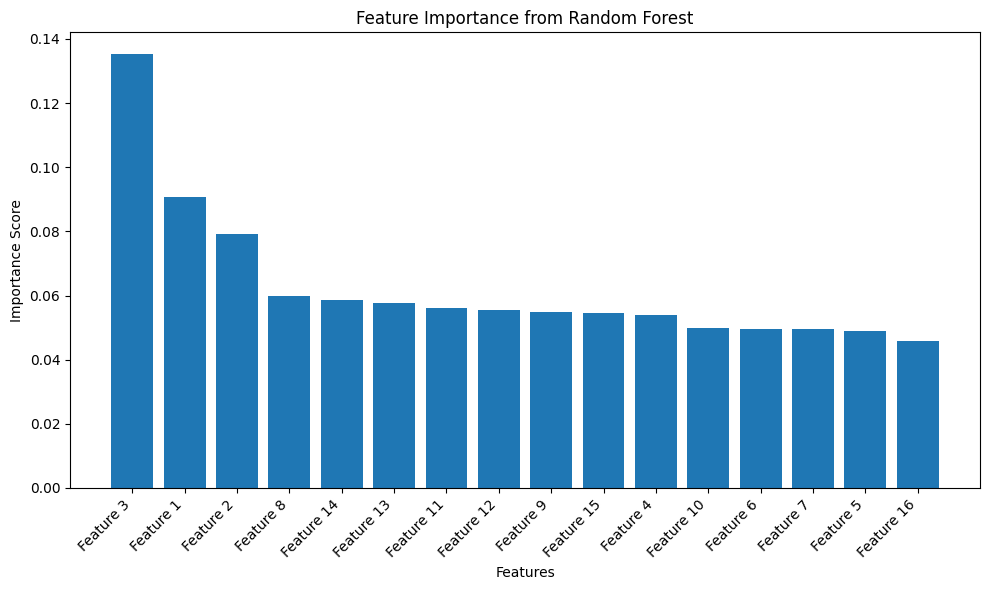

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(rf_model, feature_names=None):
    """
    Plot feature importances for a trained Random Forest model.
    
    Args:
        rf_model (RandomForestClassifier): Trained Random Forest model.
        feature_names (list, optional): List of feature names. If None, features will be named generically.
    """
    # Get feature importances
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort features by importance (descending order)

    # Feature names
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(len(importances))]

    # Sort feature names by importance
    sorted_feature_names = np.array(feature_names)[indices]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=45, ha="right")
    plt.title("Feature Importance from Random Forest")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()

# Example Usage
trained_rf_model = multiclass_models['rf']  # Your trained Random Forest model
feature_names = [f"Feature {i+1}" for i in range(X_test.shape[1])]  # Adjust based on your features
plot_feature_importance(trained_rf_model, feature_names)


In [82]:
data_cleaned2.drop(["POSTSEASON", 'SEED', 'WAB'], axis=1)

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
0,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7
1,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3
2,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9
3,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5
4,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,29.8,30.9,34.4,27.5,54.6,52.1,39.7,36.1,69.5
3519,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,25.3,20.2,26.2,27.8,56.4,48.6,36.4,33.6,64.4
3520,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,28.9,29.1,35.6,28.7,52.5,42.8,33.4,31.1,69.8
3521,112.4,97.0,0.8453,50.3,47.3,17.3,19.3,35.8,29.3,35.7,28.9,48.8,47.2,35.6,31.6,70.7


In [1]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 4.9 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pulp

# Define states and actions
states = [0, 1, 2, 3]
actions = {
    0: [0, 1, 2, 3],
    1: [0, 1, 2],
    2: [0, 1],
    3: [0],
}

# Transition probabilities P[i][a][j]
P = {
    0: {
        0: {0: 1},                   # P000 = 1
        1: {1: 0.2, 0: 0.8},         # P011 = 0.2, P010 = 0.9
        2: {2: 0.2, 1: 0.2, 0: 0.6},
        3: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
    1: {
        0: {0: 0.2, 1: 0.8},         # P100 = 0.2, P101 = 0.8
        1: {1: 0.2, 2: 0.2, 0: 0.6}, # P111 = 0.7, P112 = 0.3
        2: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
    2: {
        0: {3: 0.2, 2: 0.2, 1: 0.6}, # P200 = 0.2, P201 = 0.7, P202 = 0.1
        1: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
    3: {
        0: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
}

# Costs c(i, a)
c = {
    (3, 0): 6,
    (2, 1): 61,
    (1, 2): 81,
    (0, 3): 101,
    (2, 0): 3.9,
    (1, 1): 58.9,
    (0, 2): 78.9,
    (0, 0): 22.5,
    (0, 1): 66.3,
    (1, 0): 11.3,
}

# Revenue per item sold
REVENUE_PER_ITEM = 250

# Create the Linear Program (LP) problem
prob = pulp.LpProblem("Minimize_Cost_while_Maximizing_Profit", pulp.LpMinimize)

# Decision Variables: how many items to order in each state-action pair
x = pulp.LpVariable.dicts("Order", (states, actions), lowBound=0, cat='Integer')

# Objective: Minimize costs (including ordering and holding costs)
prob += pulp.lpSum(
    c[s, a] * x[s][a] for s in states for a in actions[s]
), "Total_Cost"

# Add constraints for transition flow (based on transition probabilities)
for s in states:
    for a in actions[s]:
        prob += pulp.lpSum(x[s][a] * P[s][a].get(s_prime, 0) for s_prime in states) == pulp.lpSum(x[s_prime][a] for s_prime in states), f"Transition_{s}_{a}"

# Solve the LP
prob.solve()

# Extract the optimal ordering quantities
optimal_orders = {}
for s in states:
    for a in actions[s]:
        optimal_orders[(s, a)] = pulp.value(x[s][a])

# Calculate profit based on revenue
total_revenue = 0
total_cost = pulp.value(prob.objective)  # The minimized cost

# Assuming that the items ordered are sold at the price of 250
for s in states:
    for a in actions[s]:
        ordered_items = optimal_orders[(s, a)]
        total_revenue += ordered_items * REVENUE_PER_ITEM

# Calculate profit (Profit = Revenue - Total Cost)
profit = total_revenue - total_cost

# Print the results
print(f"Optimal orders: {optimal_orders}")
print(f"Total Revenue: {total_revenue}")
print(f"Total Cost: {total_cost}")
print(f"Profit: {profit}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/q0/hn6y49dn3qlbbv0j58dc42tm0000gn/T/27670ead2ff045eb90f03479f9a4a6ba-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/q0/hn6y49dn3qlbbv0j58dc42tm0000gn/T/27670ead2ff045eb90f03479f9a4a6ba-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 98 RHS
At line 109 BOUNDS
At line 126 ENDATA
Problem MODEL has 10 rows, 16 columns and 30 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 0 to -1.79769e+308
Probing was tried 0 times and created 0

In [15]:
import pulp

# Input Data
states = [0, 1, 2, 3]  # State space S
actions = {
    0: [0, 1, 2, 3],
    1: [0, 1, 2],
    2: [0, 1],
    3: [0],
}  # Action space A_i

# Transition probabilities P[i][a][j]
P = {
    0: {
        0: {0: 1},
        1: {1: 0.2, 0: 0.8},
        2: {2: 0.2, 1: 0.2, 0: 0.6},
        3: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
    1: {
        0: {0: 0.2, 1: 0.8},
        1: {1: 0.2, 2: 0.2, 0: 0.6},
        2: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
    2: {
        0: {3: 0.2, 2: 0.2, 1: 0.6},
        1: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
    3: {
        0: {3: 0.2, 2: 0.2, 1: 0.5, 0: 0.1},
    },
}

# Costs c(i, a)
c = {
    (3, 0): 6,
    (2, 1): 61,
    (1, 2): 81,
    (0, 3): 101,
    (2, 0): 3.9+1.5,
    (1, 1): 58.9+1.5,
    (0, 2): 78.9+1.5,
    (0, 0): 45,
    (0, 1): 66.3+10.5,
    (1, 0): 11.3+10.5,
}
# Initialize the LP problem
lp_problem = pulp.LpProblem("Inventory_Optimization", pulp.LpMinimize)

# Decision variables z(i,a)
z = pulp.LpVariable.dicts("z", [(i, a) for i in states for a in actions[i]], lowBound=0)

# Objective Function: Minimize cost
lp_problem += pulp.lpSum(c[i, a] * z[i, a] for i in states for a in actions[i]), "Total_Cost"

# Flow conservation constraint
for j in states:
    inflow = pulp.lpSum(
        z[i, a] * P[i][a].get(j, 0)
        for i in states
        for a in actions[i]
    )
    outflow = pulp.lpSum(z[j, b] for b in actions[j])
    lp_problem += inflow == outflow, f"Flow_Conservation_{j}"

# Normalization constraint
lp_problem += pulp.lpSum(z[i, a] for i in states for a in actions[i]) == 1, "Normalization"

# Solve the LP
lp_problem.solve()

# Check the status
print(f"Status: {pulp.LpStatus[lp_problem.status]}")

# Optimal Decision Variable Values
z_values = {(i, a): pulp.value(z[i, a]) for i in states for a in actions[i]}
print("Optimal z(i,a) values:")
for key, value in z_values.items():
    print(f"z{key} = {value}")

# Compute the optimal policy f_{i,a}
print("\nOptimal Policy f_{i,a}:")
for i in states:
    denominator = sum(z_values[i, b] for b in actions[i])
    for a in actions[i]:
        if denominator > 0:
            f_ia = z_values[i, a] / denominator
            print(f"f({i},{a}) = {f_ia:.4f}")
        else:
            print(f"f({i},{a}) = 0.0000")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/q0/hn6y49dn3qlbbv0j58dc42tm0000gn/T/1442f8a80dce47319d9b5f4423c5fc9d-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/q0/hn6y49dn3qlbbv0j58dc42tm0000gn/T/1442f8a80dce47319d9b5f4423c5fc9d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 61 RHS
At line 67 BOUNDS
At line 68 ENDATA
Problem MODEL has 5 rows, 10 columns and 39 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 5 (0) rows, 10 (0) columns and 39 (0) elements
0  Obj 0 Primal inf 0.9999999 (1)
4  Obj 33.211111
Optimal - objective value 33.211111
Optimal objective 33.21111111 - 4 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00

In [16]:
# Compute Expected Demand
expected_demand = sum(a * z_values[i, a] for i in states for a in actions[i])
print(f"\nExpected Demand (items sold): {expected_demand:.4f}")

# Selling price per item
selling_price = 250

# Compute Revenue and Profit
revenue = expected_demand * selling_price
total_cost = pulp.value(lp_problem.objective)  # Total cost from LP
profit = revenue - total_cost

print(f"Revenue: {revenue:.2f}")
print(f"Total Cost: {total_cost:.2f}")
print(f"Profit: {profit:.2f}")



Expected Demand (items sold): 0.5000
Revenue: 125.00
Total Cost: 33.21
Profit: 91.79
